In [40]:
import random
import matplotlib.pyplot as plt

In [41]:
def bubble_sort_dict(dict_to_sort: dict) -> dict:
    dict_items = list(dict_to_sort.items())
    for i in range(len(dict_items)):
        for j in range(len(dict_items) - 1):
            if dict_items[j][1] > dict_items[j + 1][1]:
                dict_items[j], dict_items[j + 1] = dict_items[j + 1], dict_items[j]
    return dict(dict_items)

In [42]:
def rank_pages(pages_links: dict) -> dict:
    pages_entrances = {}
    for page in pages_links:
        pages_entrances[page] = 0
    current_page = random.choice(list(pages_links.keys()))
    for i in range(0, len(pages_links) * 10**4):
        try:
            current_page = random.choice(pages_links[current_page])
            pages_entrances[current_page] += 1/(len(pages_links) * 10**2)
        except:
            current_page = random.choice(list(pages_links.keys()))
    for page in pages_entrances:
        pages_entrances[page] = round(pages_entrances[page], 2)
    pages_entrances = bubble_sort_dict(pages_entrances)
    return pages_entrances

In [43]:
def chart_pages_entrances(pages_entrances: dict):
    websites = list(pages_entrances.keys())
    entrances = list(pages_entrances.values())
    plt.bar(websites, entrances, color ='maroon',width = 0.4)
 
    plt.xlabel('websites')
    plt.ylabel("No. of entrances to website")
    plt.show()

In [44]:
pages_links = {
    'wikipedia': ['youtube', 'facebook', 'khan'],
    'facebook': ['youtube', 'instagram', 'wikipedia'],
    'youtube': ['facebook', 'github', 'khan', 'freecodecamp'],
    'instagram': ['facebook', 'freecodecamp'],
    'github': ['freecodecamp', 'khan', 'wikipedia'],
    'freecodecamp': ['khan', 'github', 'youtube'],
    'khan': ['wikipedia', 'facebook']
}

In [45]:
pages_popularity = rank_pages(pages_links)
pages_popularity

{'instagram': 7.5,
 'github': 7.67,
 'freecodecamp': 10.45,
 'khan': 16.61,
 'youtube': 17.02,
 'wikipedia': 18.28,
 'facebook': 22.46}

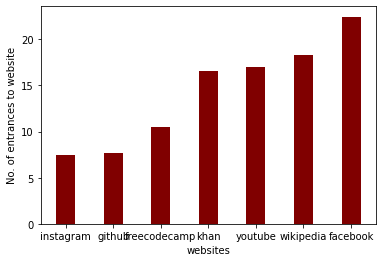

In [46]:
chart_pages_entrances(pages_popularity)

In [47]:
from bs4 import BeautifulSoup
import requests

In [48]:
def scrape_links(website):
    website_connectios = []
    res = requests.get(website)
    soup = BeautifulSoup(res.text, 'html')
    for link in soup.find_all('a', href=True):
        if link['href'][:5] == 'https' and link['href'][-4:] != '.jpg': 
            website_connectios.append(link['href'])
    return website_connectios

In [49]:
def websites_crawler(start_website):
    websites_graph = {start_website: scrape_links(start_website)}
    next_webs = scrape_links(start_website)[:5]
    checked_web = [start_website]
    for x in range(10):
        next_next_webs = [];
        for web in next_webs:
            if web not in checked_web:
                checked_web.append(web)
                websites_graph[web] = scrape_links(web)
            for next_links in scrape_links(web):
                    next_next_webs.append(next_links)
        next_webs = next_next_webs[:5]
    return websites_graph

In [50]:
k = websites_crawler('https://he.wikipedia.org/wiki/%D7%9E%D7%93%D7%A2%D7%99_%D7%94%D7%9E%D7%97%D7%A9%D7%91')

In [51]:
k

{'https://he.wikipedia.org/wiki/%D7%9E%D7%93%D7%A2%D7%99_%D7%94%D7%9E%D7%97%D7%A9%D7%91': ['https://www.wikidata.org/wiki/Special:EntityPage/Q21198',
  'https://commons.wikimedia.org/wiki/Category:Computer_science',
  'https://en.wikipedia.org/wiki/Computer_science',
  'https://af.wikipedia.org/wiki/Rekenaarwetenskap',
  'https://als.wikipedia.org/wiki/Informatik',
  'https://am.wikipedia.org/wiki/%E1%8B%A8%E1%8A%AE%E1%88%9D%E1%8D%92%E1%8B%8D%E1%89%B0%E1%88%AD%E1%8D%A1%E1%8C%A5%E1%8A%93%E1%89%B5',
  'https://an.wikipedia.org/wiki/Informatica',
  'https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%AD%D8%A7%D8%B3%D9%88%D8%A8',
  'https://arz.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D9%83%D9%85%D8%A8%D9%8A%D9%88%D8%AA%D8%B1',
  'https://as.wikipedia.org/wiki/%E0%A6%95%E0%A6%AE%E0%A7%8D%E0%A6%AA%E0%A6%BF%E0%A6%89%E0%A6%9F%E0%A6%BE%E0%A7%B0_%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8',
  'https://ast.wikipedia.org/wiki/Inform%C3%A1tica',
  'https:

In [52]:
websites_popularity = rank_pages(k)

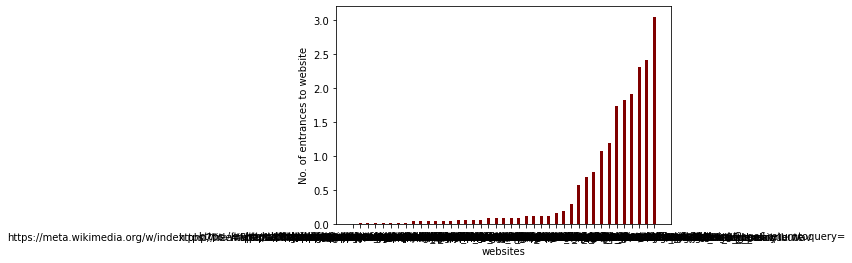

In [53]:
chart_pages_entrances(websites_popularity)